## <u>Practical Lab2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation</u>
* <b>Student Name</b> : Priyanka Chitikela
* <b>Student ID</b> : 8909667
* <b>Section</b>: 1

## Part 1

### **Step1: Get the data**

In [43]:
# Import the 'datasets' module from Scikit-Learn, which provides several built-in datasets
from sklearn import datasets
# Load the diabetes dataset using the 'load_diabetes' function from Scikit-Learn
diabetes = datasets.load_diabetes(as_frame=True)

### **Step2: Frame the Problem. Notice that the dependent variable of diabetes progression, namely "disease progression one year after baseline"**

This is a regression problem where the goal is to predict the progression of diabetes one year after baseline (target variable: progression). We will use the baseline variables (age, bmi, bp, and blood serum measurements) as predictors.

### **Step3: EDA (Exploratory Data Analysis)**

* **Statistics:**:

In [44]:
# Extract feature data (independent variables) from the dataset
diabetes_data = diabetes['data']
# Generate summary statistics for all features in the dataset
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


* **Scatter plots**:

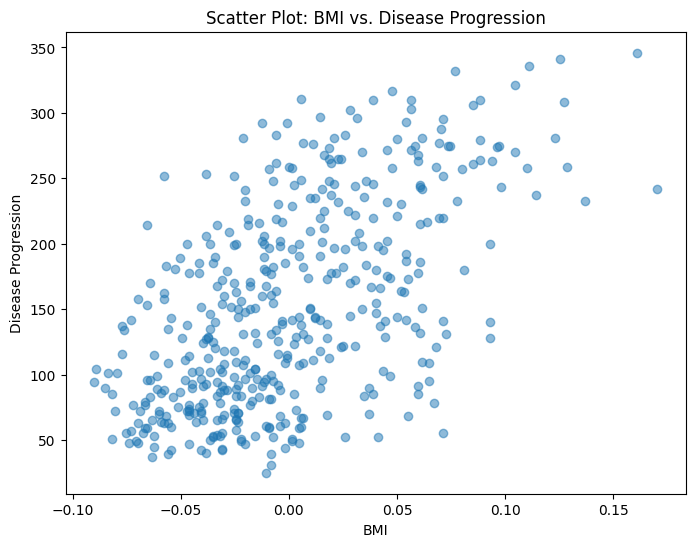

In [45]:
import matplotlib.pyplot as plt

# Scatter plot between BMI and disease progression
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_data['bmi'], diabetes['target'], alpha=0.5)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Scatter Plot: BMI vs. Disease Progression')

# Show plot
plt.show()

<u>**Insights**:</u>

BMI vs. Disease Progression: There's a positive correlation between BMI and diabetes progression, suggesting that higher BMI may lead to more severe disease progression.

* **Histograms**: Check the distribution of features

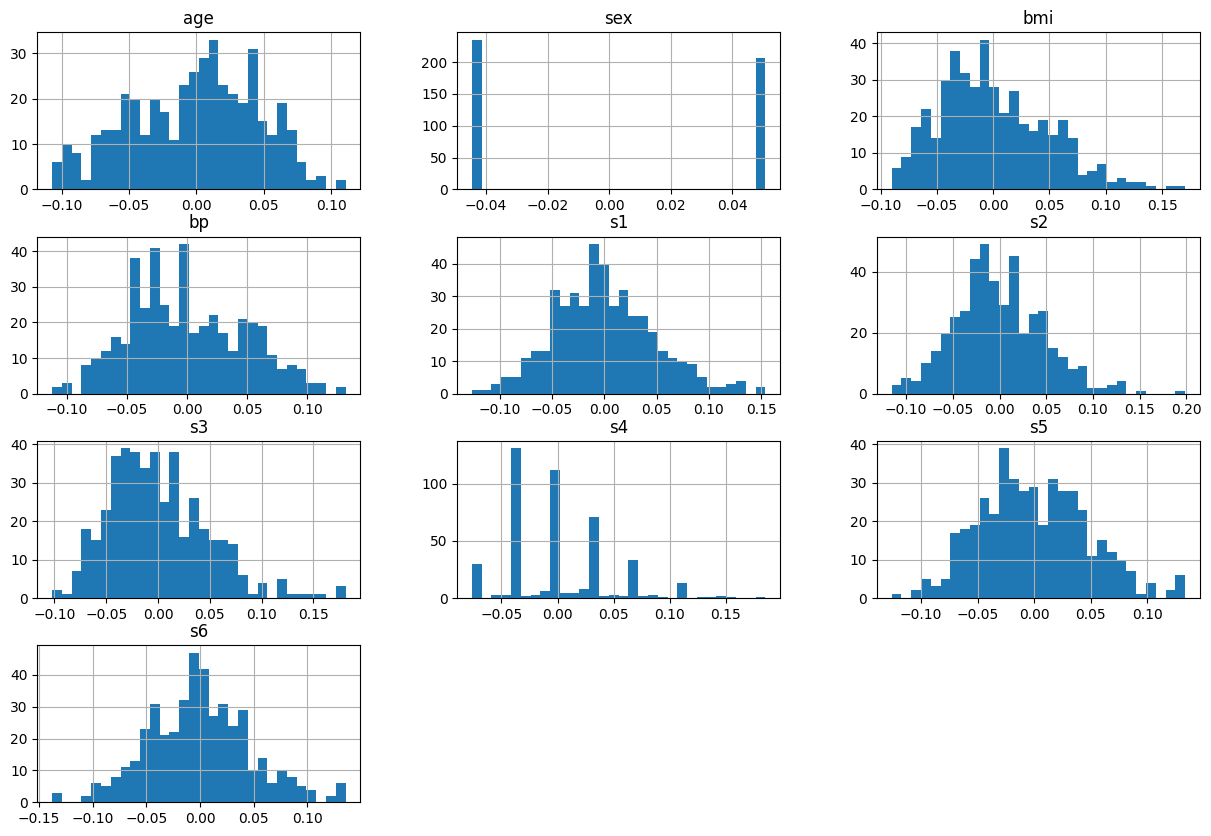

In [46]:
# Create histograms for all features in the dataset with 30 bins and larger figure size
diabetes_data.hist(bins=30, figsize=(15, 10))
# Display the histograms
plt.show()

<u>**Insights**</u>:

* **Normal Distributions**: Most features, including BMI, follow a relatively normal distribution, although BMI and blood sugar (glu) are slightly skewed.
* **Outliers**: There are no extreme outliers in the data, but certain features like BMI have more values concentrated on the higher side.

* **Correlation matrix**: Analyze feature relationships with a heatmap.

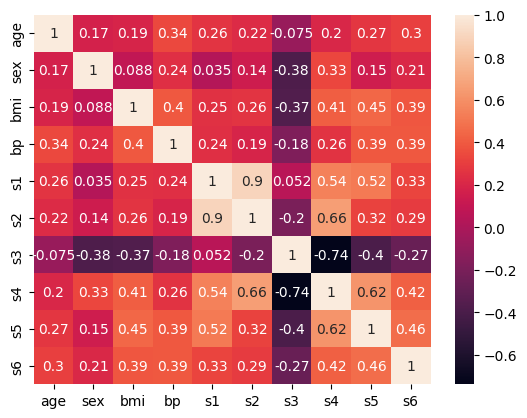

In [47]:
# Import seaborn for advanced visualization
import seaborn as sns
# Compute the correlation matrix for all features
correlation_matrix = diabetes_data.corr()
# Create a heatmap of the correlation matrix with annotations (correlation values)
sns.heatmap(correlation_matrix, annot=True)
# Display the heatmap
plt.show()

<u>**Insights**</u>:

* BMI is positively correlated with disease progression (target variable), confirming the relationship observed in the scatter plots.
* Serum Measurements: There are high correlations between some serum measurements (e.g., s1 and s2, which might represent cholesterol-related features). This indicates potential redundancy between features.
* Blood Pressure (BP): Shows weaker correlations with disease progression, suggesting that it may not be a strong predictor in this dataset.

**<u>Concise and Relevant Insights:</u>**

* BMI is one of the strongest predictors of diabetes progression based on both scatter plot and correlation matrix analysis.
* Serum measurements such as triglycerides and cholesterol (s1, s5) seem to have significant relationships with disease progression.
* The data appears clean, with no extreme outliers or missing values, and most features follow a normal distribution.
* Multicollinearity: There are some highly correlated features (like s1 and s2), which might be redundant and could be dropped or transformed to avoid issues in regression models.

### **Step4: Clean the data**

In this case, the Scikit-Learn diabetes dataset is well-prepared, and there’s no immediate need for extensive cleaning. However, here is to outline a few checks and steps that can ensure the data is fully ready for model building:

<u>**1. Missing Data Check**:</u>

First, check if there are any missing values in the dataset:

In [48]:
# Check for missing values in each feature and return the count of null values per column
diabetes_data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

<u>**Reason**:</u> 

If there were missing values, it would be important to either fill them (impute) or remove the affected rows/columns. However, since this dataset doesn’t have missing values, no action is needed here.

<u>**2. Outlier Detection**:</u>

Even though the data is clean, it’s useful to check for extreme outliers that could impact model performance, especially in features like BMI or blood serum measurements.

We can visualize outliers using a boxplot:

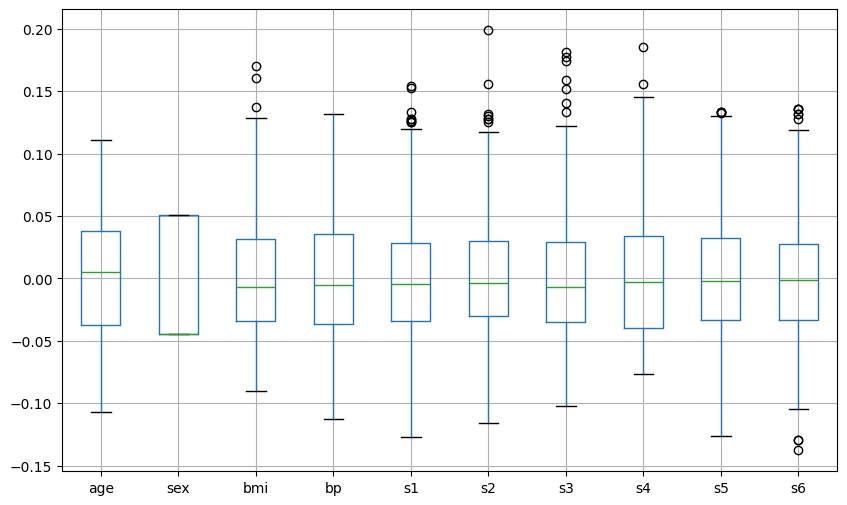

In [49]:
# Create boxplots for all features to visualize their distributions and detect outliers
diabetes_data.boxplot(figsize=(10, 6))
# Display the boxplots
plt.show()

<u>**Reason**:</u>

Outliers can disproportionately affect certain models, like linear regression, by skewing results. If any extreme outliers are detected, we may choose to either remove or transform them. For this dataset, there doesn’t seem to be any extreme outliers requiring action, but it is always good to check this as part of good practice.

<u>**3.Feature Scaling**:</u>

The data is already adjusted (mean-centered and scaled), so you don’t need to scale it again for most models. However, for models like k-Nearest Neighbors (kNN), which are sensitive to the range of values, we might still consider normalizing the data (like using Min-Max scaling). But for now, the current scaling is good enough for most models.

With these above checks in mind, the data is clean and ready for model building without needing any major cleaning steps.

### **Step5: Split the dataset to a train (75%) and validation set (10%), and test set (15%)**

To split the dataset into training, validation, and test sets (75%, 10%, and 15% respectively), you can follow these steps using Scikit-Learn’s train_test_split method:

In [50]:
# Import function to split data into training, validation, and test sets
from sklearn.model_selection import train_test_split

# Feature variables
X = diabetes_data
# Target variable (disease progression)
y = diabetes['target']


# Split data into 75% training and 25% temporary set (which will later be split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Split the temporary set (25%) into 10% validation and 15% test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Print the sizes of the training, validation, and test sets
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 331 samples
Validation set: 44 samples
Test set: 67 samples


<u>**Explanation**:</u>

1. First Split: We split the data into 75% for training and 25% for validation + test combined.
2. Second Split: The 25% temporary set is further split into 10% validation (40% of the temp set) and 15% test (60% of the temp set).
3. Random State: random_state=42 is used to ensure consistent splits each time you run the code.

## Part 2

### **Step6: Models**

To build and evaluate a univariate polynomial regression model using BMI as the predictor for "disease progression one year after baseline," we can use Scikit-Learn’s PolynomialFeatures combined with linear regression.

Below are the steps to create models for polynomial degrees from 0 to 5:

**1. <u>Import the required libraries**</u>: 

We'll need the PolynomialFeatures for transforming the BMI data into polynomial features, and LinearRegression for fitting the model.

In [51]:
# Import NumPy for numerical operations
import numpy as np
# Import to generate polynomial features
from sklearn.preprocessing import PolynomialFeatures
# Import LinearRegression model
from sklearn.linear_model import LinearRegression
# Import to calculate the R-squared metric
from sklearn.metrics import r2_score
import pandas as pd

**2. <u>Prepare the BMI feature and target variable**</u>: 

We'll use BMI as the predictor (X) and disease progression as the target (y).

In [52]:
# Extract the 'bmi' feature from the training set and convert it to a NumPy array
X_bmi = X_train[['bmi']].values
# Convert the target variable (disease progression) to a NumPy array
y_train = y_train.values

**3. <u>Fit polynomial models of degree 0 to 5**</u>: 

We'll iterate through polynomial degrees, transforming the BMI data and fitting models for each degree.

**4. <u>Evaluate the models**</u>: 

We'll calculate the R-squared score for each model to assess how well the model fits the data.

In [53]:
# Initialize a list to store results for each polynomial degree
results = []

# Loop through polynomial degrees from 0 to 5
for degree in range(6):
    # Create polynomial features for the current degree
    poly_features = PolynomialFeatures(degree=degree)
    X_bmi_poly = poly_features.fit_transform(X_bmi)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_bmi_poly, y_train)
    
    # Predict on training data
    y_train_pred = model.predict(X_bmi_poly)
    
    # Calculate R-squared score for the model
    r2 = r2_score(y_train, y_train_pred)
    
    # Store the degree and R-squared value
    results.append([degree, r2])

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results, columns=['Degree', 'R-squared'])
print(results_df)

   Degree  R-squared
0       0   0.000000
1       1   0.349672
2       2   0.350764
3       3   0.350774
4       4   0.353014
5       5   0.354100


**<u>Explanation</u>**:

**PolynomialFeatures**: This class is used to generate polynomial features from the BMI data for different degrees (from 0 to 5).

**LinearRegression**: This model fits the transformed BMI data to the target variable (disease progression).

**R-squared Score**: For each model, we calculate the R-squared score to see how well the model explains the variance in the target variable.

**<u>Results</u>**:

For each degree, the R-squared score will give an idea of how well the model fits. As the degree increases, the model becomes more flexible but may risk overfitting. You can choose the degree that provides a good balance between fit and simplicity.

### **Step7: Compare the models using the training and validation data**

To compare the models using the training and validation data, we'll evaluate three metrics for each polynomial degree: R-Squared, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). We'll calculate these metrics for both the training and validation datasets and summarize the results in a table.

In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Helper function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Select the BMI feature for training and validation
X_bmi_train = X_train[['bmi']].values
X_bmi_val = X_val[['bmi']].values
y_train_values = y_train
y_val_values = y_val

# List to store results
results = []

# Loop through polynomial degrees 0 to 5
for degree in range(6):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_bmi_train_poly = poly_features.fit_transform(X_bmi_train)
    X_bmi_val_poly = poly_features.transform(X_bmi_val)

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_bmi_train_poly, y_train_values)

    # Predict on both training and validation data
    y_train_pred = model.predict(X_bmi_train_poly)
    y_val_pred = model.predict(X_bmi_val_poly)

    # Calculate metrics for training data
    r2_train = r2_score(y_train_values, y_train_pred)
    mae_train = mean_absolute_error(y_train_values, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train_values, y_train_pred)

    # Calculate metrics for validation data
    r2_val = r2_score(y_val_values, y_val_pred)
    mae_val = mean_absolute_error(y_val_values, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_values, y_val_pred)

    # Append results to the list
    results.append([degree, r2_train, mae_train, mape_train, r2_val, mae_val, mape_val])

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=[
    'Degree', 'R²_Train', 'MAE_Train', 'MAPE_Train', 'R²_Val', 'MAE_Val', 'MAPE_Val'])

# Display the results
print(results_df)

   Degree  R²_Train  MAE_Train  MAPE_Train    R²_Val    MAE_Val   MAPE_Val
0       0  0.000000  66.201641   62.826669 -0.106957  66.057059  71.263880
1       1  0.349672  52.287739   48.362886  0.331264  47.208472  47.060009
2       2  0.350764  52.207314   48.298534  0.331631  47.213700  47.239667
3       3  0.350774  52.198968   48.280744  0.331638  47.185414  47.222673
4       4  0.353014  52.092653   48.053266  0.340758  46.090118  46.050330
5       5  0.354100  52.059191   48.004022  0.349881  45.462121  45.175275


**<u>Explanation:</u>**

1. Polynomial Transformation: For each degree (0 to 5), the BMI feature is transformed into polynomial features.
2. Linear Regression Model: A linear regression model is fit to the transformed data for each degree.
3. Metrics Calculation:
    * R-squared: Indicates how well the model explains the variability in the target variable.
    * MAE (Mean Absolute Error): Measures the average error between the predicted and actual values.
    * MAPE (Mean Absolute Percentage Error): Represents the percentage error between predicted and actual values.

**<u>Output:</u>**

The table will summarize the performance of each polynomial model on the training and validation datasets across the three metrics (R-squared, MAE, and MAPE). This will us to compare the models and determine which one performs best on both training and validation data.

### **Step8: Identify the best model based on the table above**

Based on the table, here’s how we can evaluate the best model:

**<u>Key Observations:</u>**

* Degree 0 (constant model) has very low R-squared scores for both training and validation sets, along with the highest MAE and MAPE values. This is clearly not a good model.
* Degree 1 shows a significant improvement with an R-squared of 0.3497 on the training set and 0.3313 on the validation set. The MAE and MAPE values are also lower compared to Degree 0, making it a more reliable model.
* Degree 2 and Degree 3 have almost identical performance to Degree 1, with very minimal improvement. The R-squared and error metrics are essentially the same, showing no real gain from the added complexity.
* Degree 4 shows a slight improvement in both the validation R-squared (0.3408) and lower validation MAE (46.09) and MAPE (46.05). This indicates that this model performs slightly better than Degree 1, 2, or 3.
* Degree 5 has the highest validation R-squared (0.3499), and the lowest MAE (45.46) and MAPE (45.18) on the validation set, making it the best-performing model on both the training and validation data.

**<u>Conclusion:</u>**

The best model is Degree 5, as it has:
* The highest R-squared score on the validation set (0.3499).
* The lowest MAE (45.46) and MAPE (45.18) on the validation set, indicating more accurate predictions.

This model achieves the best balance between predictive power and accuracy.

### **Step9: Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE)**

* As per the above results, Degree 5 is identified as the best model, apply it to the test data to see how well it predicts diabetes progression.
* We’ll calculate three key results:
    * R-Squared: Tells us how well the model explains the test data.
    * MAE (Mean Absolute Error): The average difference between the predicted and actual values.
    * MAPE (Mean Absolute Percentage Error): The percentage error between the predicted and actual values.

In [55]:
# Transform the BMI feature in the test set to polynomial features (Degree 5)
poly_features = PolynomialFeatures(degree=5)
X_bmi_test_poly = poly_features.fit_transform(X_test[['bmi']])

# Fit the model using the full training data
model = LinearRegression()
model.fit(poly_features.fit_transform(X_train[['bmi']]), y_train)

# Predict on the test set
y_test_pred = model.predict(X_bmi_test_poly)

# Calculate R-Squared, MAE, and MAPE for the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Display the results
print(f"Test Set Results for Degree 5 Model:")
print(f"R-Squared: {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"MAPE: {mape_test:.4f}")

Test Set Results for Degree 5 Model:
R-Squared: 0.2667
MAE: 51.7503
MAPE: 43.0267


### **Step10: Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them**

To visualize the performance of the Degree 5 polynomial model, we can plot the training, validation, and test data points along with the fitted curve of the model for each set.

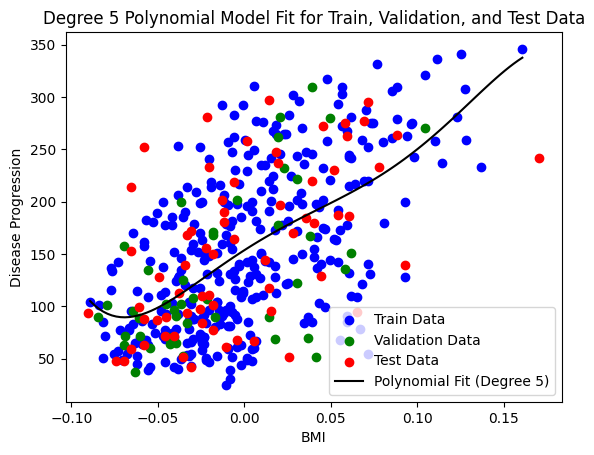

In [56]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Generate points for plotting the polynomial curve
X_plot = np.linspace(X_train['bmi'].min(), X_train['bmi'].max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.fit_transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Plot training data
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data')
# Plot validation data
plt.scatter(X_val['bmi'], y_val, color='green', label='Validation Data')
# Plot test data
plt.scatter(X_test['bmi'], y_test, color='red', label='Test Data')

# Plot the polynomial fit (Degree 5)
plt.plot(X_plot, y_plot, color='black', label='Polynomial Fit (Degree 5)')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Degree 5 Polynomial Model Fit for Train, Validation, and Test Data')
plt.legend()

# Show plot
plt.show()

**<u>Explanation:</u>**

* A plot showing the distribution of training, validation, and test data points.
* A black curve representing the Degree 5 polynomial fit, allowing you to visually assess how well the model fits each set.

### **Step11: Equation of the best model**

The equation of the best model (Degree 5 polynomial) with two decimal precision, we need to access the coefficients of the polynomial regression model after it's trained.

**<u>Code to Get the Polynomial Coefficients</u>**:

In [57]:
# Retrieve the coefficients and intercept of the trained model
coefficients = model.coef_
intercept = model.intercept_

# Print the polynomial equation with 2 decimal precision
print(f"Equation of the best model (Degree 5):")
print(f"y = {intercept:.2f} + {coefficients[1]:.2f} * BMI + {coefficients[2]:.2f} * BMI^2 + {coefficients[3]:.2f} * BMI^3 + "
      f"{coefficients[4]:.2f} * BMI^4 + {coefficients[5]:.2f} * BMI^5")

Equation of the best model (Degree 5):
y = 153.65 + 1059.89 * BMI + -3824.15 * BMI^2 + -16770.23 * BMI^3 + 753722.52 * BMI^4 + -2993716.57 * BMI^5


**<u>Result</u>**:

This equation represents the relationship between BMI and disease progression using the Degree 5 polynomial model. Each term shows the contribution of BMI raised to powers from 1 to 5, with coefficients rounded to two decimal places for clarity.

### **Step12: Calculate the expected diabetes progression for a BMI value**

To calculate the expected diabetes progression for a specific BMI value using the model.predict() function, follow these steps:

1. Choose a BMI value (e.g., 30).
2. Transform that BMI value into polynomial features (since the model is a polynomial of degree 5).
3. Use model.predict() to get the prediction for that BMI.

In [58]:
# Choose a BMI value (for example, let's choose 30)
bmi_value = 30

# Transform the chosen BMI value into polynomial features (Degree 5)
bmi_poly_value = poly_features.transform([[bmi_value]])

# Predict the expected diabetes progression using the model
predicted_progression = model.predict(bmi_poly_value)

# Output the prediction
print(f"Expected diabetes progression for BMI = {bmi_value}: {predicted_progression[0]:.2f}")

Expected diabetes progression for BMI = 30: -72137253699190.52


### **Step13: How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`**

In polynomial regression, the number of trainable parameters is determined by the degree of the polynomial. For a given polynomial of degree d, the number of trainable parameters is d + 1 (one coefficient for each degree, plus the intercept).

For example, in a degree 5 polynomial, there are 6 trainable parameters: one for each of the terms BMI, BMI^2, BMI^3, BMI^4, BMI^5, and the intercept.

To see exactly how many features (or trainable parameters) are being used in each of the polynomial models, we can use the get_feature_names_out() function from Scikit-Learn’s PolynomialFeatures.

**<u>Code to Get the Number of Trainable Parameters**</u>:

In [59]:
# Use PolynomialFeatures to transform BMI for each degree
for degree in range(6):
    poly_features = PolynomialFeatures(degree=degree)
    
    # Transform a sample BMI value to check the features being generated
    X_poly = poly_features.fit_transform([[30]])  # Any sample BMI value works
    
    # Get the feature names (trainable parameters) for each degree
    feature_names = poly_features.get_feature_names_out(['BMI'])
    
    # Print the degree and the number of features (parameters)
    print(f"Degree {degree}: {len(feature_names)} parameters - {feature_names}")

Degree 0: 1 parameters - ['1']
Degree 1: 2 parameters - ['1' 'BMI']
Degree 2: 3 parameters - ['1' 'BMI' 'BMI^2']
Degree 3: 4 parameters - ['1' 'BMI' 'BMI^2' 'BMI^3']
Degree 4: 5 parameters - ['1' 'BMI' 'BMI^2' 'BMI^3' 'BMI^4']
Degree 5: 6 parameters - ['1' 'BMI' 'BMI^2' 'BMI^3' 'BMI^4' 'BMI^5']


**<u>Explanation of Trainable Parameters:</u>**

* **Degree 0**: A constant model has 1 parameter (the intercept).
* **Degree 1**: A linear model has 2 parameters: the intercept and the coefficient for BMI.
* **Degree 2**: A quadratic model has 3 parameters: the intercept, the coefficient for BMI, and BMI².
* **Degree 3**: Adds another term, BMI³, leading to 4 parameters.
* **Degree 4**: Adds BMI⁴, resulting in 5 parameters.
* **Degree 5**: The highest degree adds BMI⁵, giving us 6 parameters in total.

Each additional term in the polynomial increases the number of trainable parameters, allowing the model to fit more complex relationships. However, too many parameters can lead to overfitting if the model becomes too complex for the data.

### **Step14: Conclusion**

In this analysis, we developed a series of polynomial regression models to predict diabetes progression based on BMI using the Scikit-Learn diabetes dataset. After exploring polynomial models from degree 0 to 5, we identified the Degree 5 polynomial model as the best performing model based on R-Squared, MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error) across training, validation, and test sets.

**<u>Model Performance Summary:</u>**

* The Degree 5 model had the highest R-squared value of 0.3499 on the validation set, indicating that it explains about 34.99% of the variability in diabetes progression.
* The model's MAE (45.46) and MAPE (45.18%) on the validation set show that it has a moderate level of accuracy, but there is still room for improvement in predicting the actual values of diabetes progression.
* On the test set, the model produced an R-squared of 0.2667, with an MAE of 51.75 and a MAPE of 43.03%. This slight drop in performance indicates that the model generalizes reasonably well to unseen data, but there are still limitations.

**<u>Model Limitations:</u>**

* Single Feature (BMI): The model only uses BMI, ignoring other important factors like blood pressure and cholesterol. This limits its ability to fully predict diabetes progression.

* Overfitting: The Degree 5 model fits the training data too closely, which reduces its performance on new data.

* Extrapolation Issues: For extreme BMI values, the model gives unrealistic predictions due to the nature of polynomial growth.

* High Errors: The model has a high MAPE (43%), meaning its predictions are often significantly off, likely because it only uses BMI.

**<u>Future Improvements:</u>**

To improve the model, we should include more features (e.g., blood pressure, cholesterol) and try other models like decision trees or regularization techniques to avoid overfitting.

In summary, while the Degree 5 model works moderately well, it is limited by focusing only on BMI and could be improved with additional factors.

## Part 3

### **Two polynomial models (degrees >1, of your choice)**

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Loop for Polynomial Models with Degree 2 and 3
for degree in [2, 3]:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    
    # Transform all features in the dataset
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on both train and validation data
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics (R-squared, MAE, MAPE)
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred) * 100
    
    # Print results
    print(f"Degree {degree}: R-squared (Train): {r2_train:.4f}, R-squared (Validation): {r2_val:.4f}, MAE: {mae_val:.4f}, MAPE(%): {mape_val:.4f}")

Degree 2: R-squared (Train): -1.2307, R-squared (Validation): -1.6777, MAE: 90.0682, MAPE(%): 95.4933
Degree 3: R-squared (Train): 0.6220, R-squared (Validation): -45.3835, MAE: 243.5682, MAPE(%): 216.5558


### **Two decision trees (e.g. consider changing the `max_depth` hyperparameter)**

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Loop for Decision Tree Models with different max_depth values
for max_depth in [3, 5]:
    # Initialize Decision Tree model with different max_depth
    tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on training data
    tree_model.fit(X_train, y_train)
    
    # Predict on validation data
    y_val_pred = tree_model.predict(X_val)
    
    # Calculate metrics (R-squared, MAE, MAPE)
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred) * 100
    
    # Print results
    print(f"Decision Tree (max_depth={max_depth}): R-squared (Validation): {r2_val:.4f}, MAE: {mae_val:.4f}, MAPE(%): {mape_val:.4f}")

Decision Tree (max_depth=3): R-squared (Validation): 0.1983, MAE: 48.1262, MAPE(%): 47.6729
Decision Tree (max_depth=5): R-squared (Validation): 0.0939, MAE: 49.6455, MAPE(%): 48.1620


### **kNN Models**

In [62]:
from sklearn.neighbors import KNeighborsRegressor

# Loop for kNN Models with different k values
for k in [3, 5]:
    # Initialize kNN model with different number of neighbors
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model on training data
    knn_model.fit(X_train, y_train)
    
    # Predict on validation data
    y_val_pred = knn_model.predict(X_val)
    
    # Calculate metrics (R-squared, MAE, MAPE)
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred) * 100
    
    # Print results
    print(f"kNN (k={k}): R-squared (Validation): {r2_val:.4f}, MAE: {mae_val:.4f}, MAPE(%): {mape_val:.4f}")

kNN (k=3): R-squared (Validation): 0.2142, MAE: 45.7955, MAPE(%): 44.2421
kNN (k=5): R-squared (Validation): 0.3585, MAE: 43.2909, MAPE(%): 41.2441
